# NLP Explore Notebook

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud, ImageColorGenerator, get_single_color_func
import random

import matplotlib.pyplot as plt
import seaborn as sns

from env import user, password, host

### 1. Spam Data

#### Load the spam data set.


In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Cleaning...

In [3]:
def basic_clean(dirty_words):
    '''This function takes in words (single word, article, paragraph, etc) and then 
    lowercases all letters, normalizes the letters, and removes special characters'''
        # Lowercases all letters
    all_lower_case_words = dirty_words.lower()
        # Normalizes the letters
    normalized_words = unicodedata.normalize('NFKD', all_lower_case_words).encode('ascii', 'ignore').decode('utf-8')
        # Removes special chars
    remove_special_characters = re.sub(r"[^a-z0-9'\s]", '', normalized_words)
    return remove_special_characters

In [4]:
# combine all messages in single string by label

ham_words = basic_clean(' '.join(df[df.label == 'ham'].text))
spam_words = basic_clean(' '.join(df[df.label == 'spam'].text))
all_words = basic_clean(' '.join(df.text))

In [5]:

ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [6]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


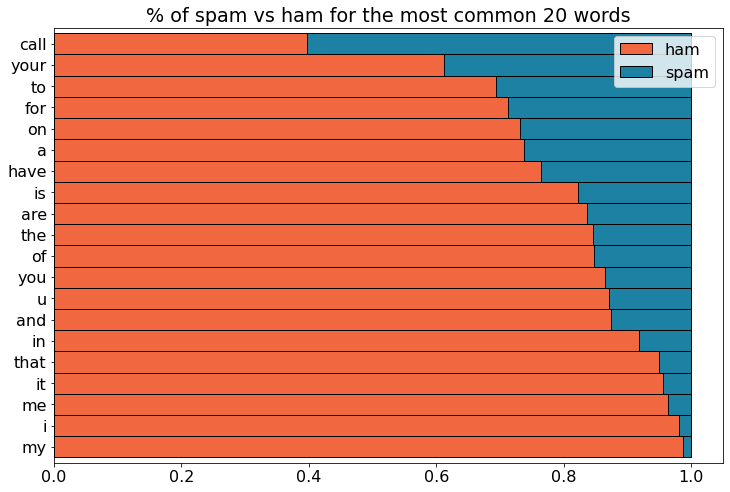

In [7]:

plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', color=['#F06740', '#1C81A3'], figsize=(12, 8)))


plt.title('% of spam vs ham for the most common 20 words')

plt.show()

#### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [8]:
ham_bigram = pd.DataFrame(nltk.bigrams(ham_words.split()))
ham_bigram.value_counts().head()

0     1   
are   you     173
i     am      132
have  a       110
i     will     98
you   are      91
dtype: int64

In [9]:
spam_bigram = pd.DataFrame(nltk.bigrams(spam_words.split()))
spam_bigram.value_counts().head()

0       1     
you     have      73
have    won       54
your    mobile    49
to      claim     46
please  call      44
dtype: int64

In [10]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(200, 50%%, %d%%)" % random.randint(60, 100)

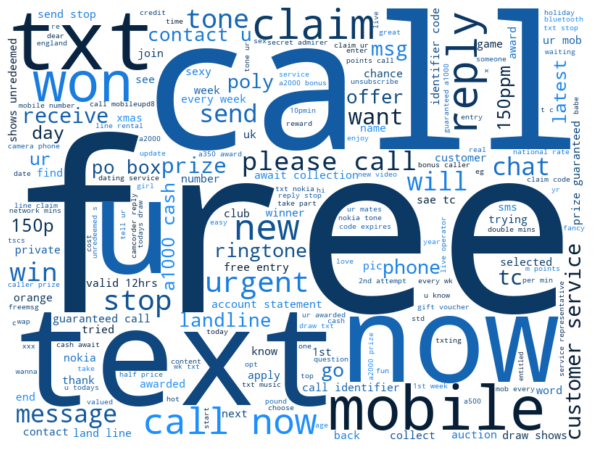

In [11]:
color_func1 = get_single_color_func('dodgerblue')


plt.figure(figsize=(12, 8))
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img.recolor(color_func=color_func1, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

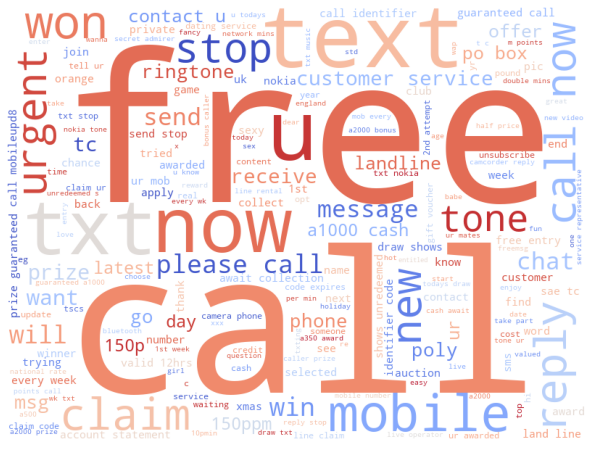

In [12]:
plt.figure(figsize=(12, 8))
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img.recolor(colormap='coolwarm'))
plt.axis('off')
plt.show()

#### Is there any overlap in the bigrams for the spam data and the ham data?

In [13]:
ham_bigram = ham_bigram.rename(columns={0:'first_word', 1:'second_word'})
ham_bigram['combined'] = ham_bigram.first_word + ' ' + ham_bigram.second_word

In [16]:
ham_bigram = ham_bigram.drop(columns=['first_word', 'second_word'])
ham_bigram.head()

,combined
0,go until
1,until jurong
2,jurong point
3,point crazy
4,crazy available


In [17]:
spam_bigram = spam_bigram.rename(columns={0:'first_word', 1:'second_word'})
spam_bigram['combined'] = spam_bigram.first_word + ' ' + spam_bigram.second_word

In [18]:
spam_bigram = spam_bigram.drop(columns=['first_word', 'second_word'])
spam_bigram.head()

,combined
0,free entry
1,entry in
2,in 2
3,2 a
4,a wkly


In [ ]:
for gram in spam_bigram:
    if spam_bigram.com

#### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.